# Exercício 11 de Análise de Componentes Independentes
Pedro Bandeira de Mello Martins

CPE 782 - Análise de Componentes Independentes



Análise feita para 100 amostras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import entropy, chi2_contingency, shapiro

%matplotlib inline
from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

#Notes:
#SHAPIRO: The algorithm used is described in [R634] but censoring parameters as 
#        described are not implemented. For N > 5000 the W test statistic is 
#        accurate but the p-value may not be.

In [2]:
learning_rate = 1e-6
gaussian_distribution = np.random.normal(0,1,1000)
shapiro(np.random.uniform(-1,1,1000))

(0.95306396484375, 2.4365471828031386e-17)

In [3]:
filePath = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/EleventhMixture100Stats.txt'
distDataFrame = pd.read_table(filePath, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.T.head())

          0          1          2          3
0 -7.149059  -9.344606  -4.117022  -8.224280
1 -5.409809  -7.095397  -2.626432  -5.661276
2 -8.583704 -11.791890 -10.000964 -13.290034
3 -3.419222  -3.833004  -1.314751  -2.438817
4 -7.175127  -8.783212  -4.867490  -9.896496


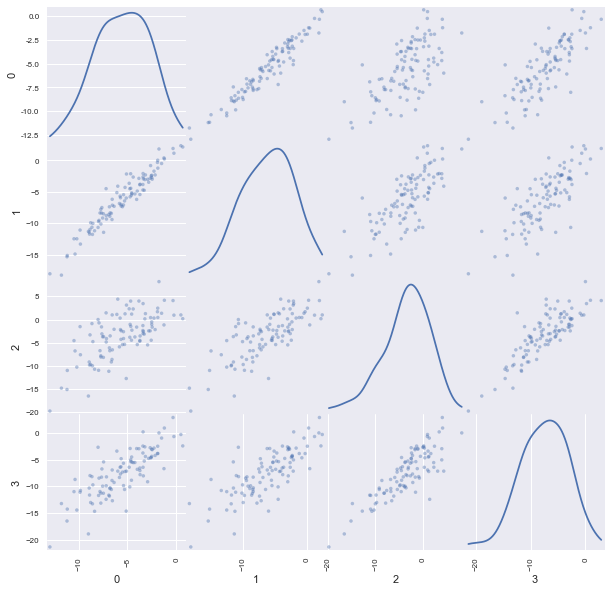

In [4]:
scatter_matrix(distDataFrame.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [5]:
resultsTable(mixtures)

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,0.5557,0.991,0.74295
1,0,0.4615,0.9844,0.28592
2,0.2384,0.2077,0.9713,0.027651
3,0.0457,6.7996,0.9887,0.563


## NPCA-RLS Algorithm

In [6]:
[yNPCA, WNPCA] = NPCA_RLS(mixtures,runs = 1)

Execution time: 0.019001483917236328 seconds


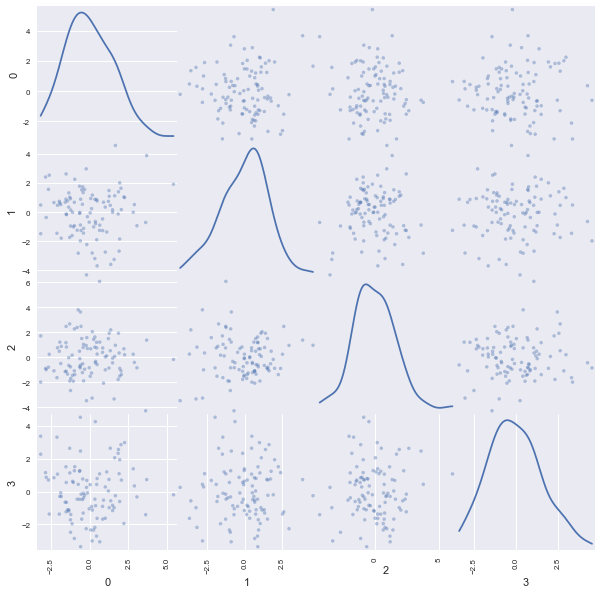

In [7]:
scatter_matrix(pd.DataFrame(yNPCA.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.1046,0.1472,0.983,0.22628
1,0.0235,0.0906,0.9864,0.40002
2,0.2872,0.5559,0.9791,0.11403
3,0,0.0579,0.9847,0.30448


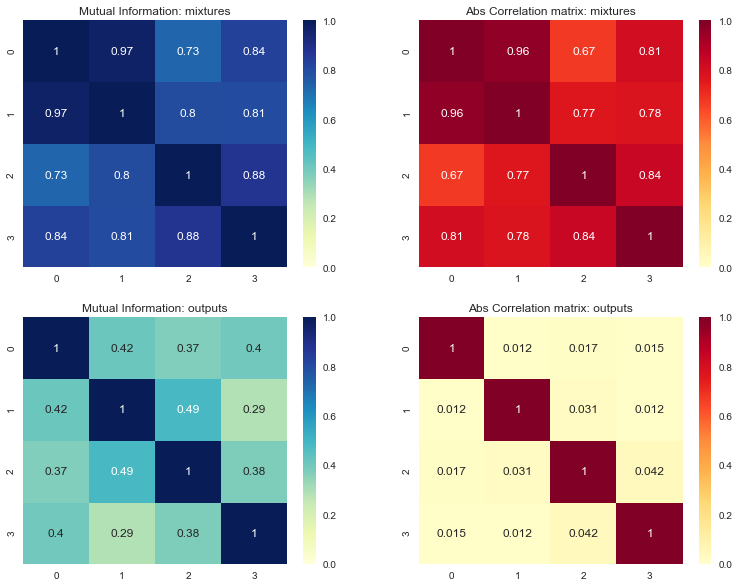

In [8]:
resultsTable(yNPCA)
plot_MutualInformation(mixtures, y = yNPCA, KDE = True)

## Chichocki-Unbehauen Algorithm Feedback network

In [9]:
[yFeedback, WFeedback] = cichocki_Feedback(mixtures, learningRate = 1e-5, decayRate = 1e-5, runs  = 1) 

Execution time: 0.01400136947631836 seconds


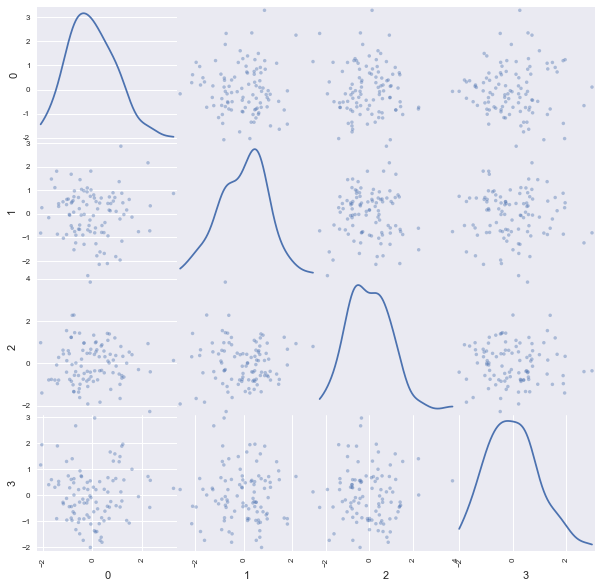

In [10]:
scatter_matrix(pd.DataFrame(yFeedback.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.1006,0.0399,0.9819,0.18764
1,0.2182,0.0898,0.9873,0.45752
2,0.2085,0.2599,0.9762,0.066523
3,0.0368,0.2291,0.9813,0.16749


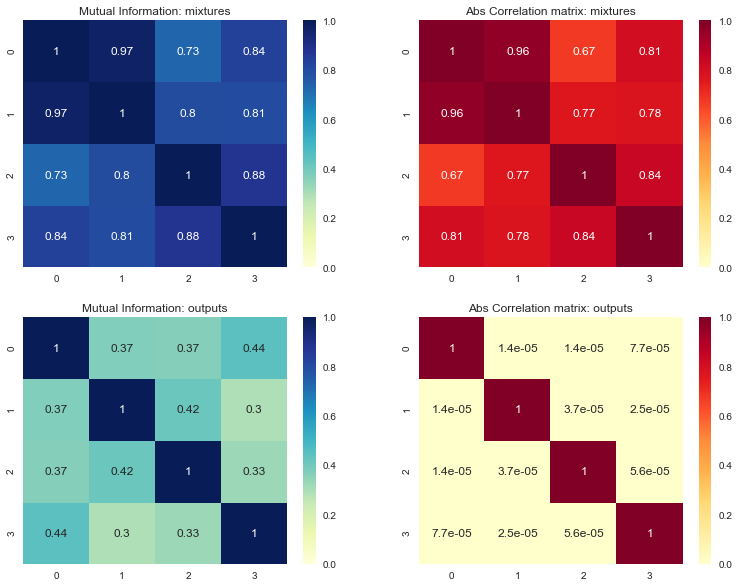

In [11]:
resultsTable(yFeedback)
plot_MutualInformation(mixtures, y = yFeedback, KDE = True)

## Chichocki-Unbehauen Algorithm Feedforward network

In [12]:
[yFeedforward, WFeedforward] = cichocki_Feedforward(mixtures, learningRate = 1e-6, runs = 1)

Execution time: 0.01700139045715332 seconds


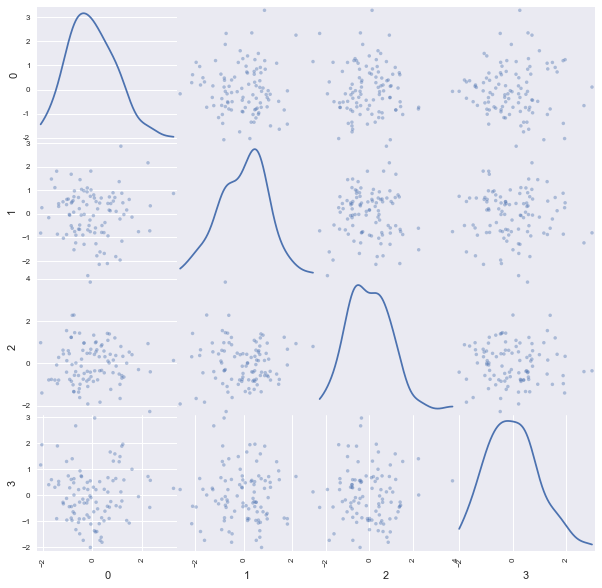

In [13]:
scatter_matrix(pd.DataFrame(yFeedforward.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,0.4066,0.9819,0.1879
1,0.0999,0.043,0.9873,0.45786
2,0.235,0.62,0.9762,0.066634
3,0.0723,0.4606,0.9813,0.1676


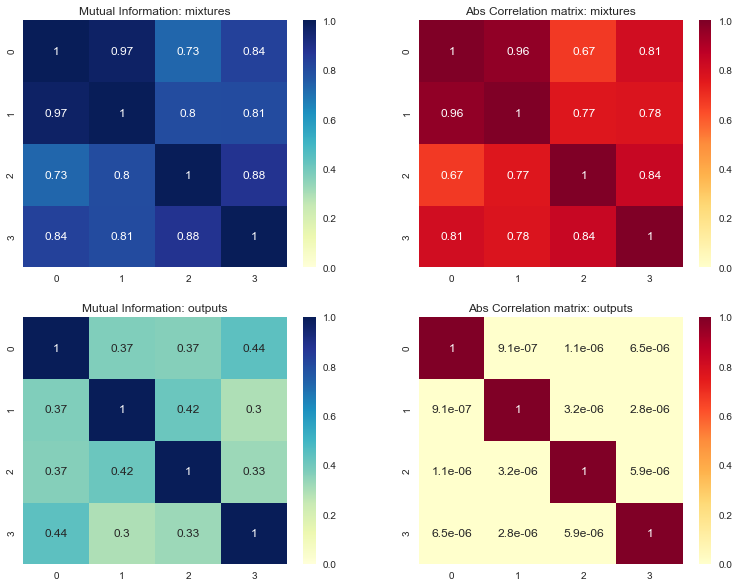

In [14]:
resultsTable(yFeedforward)
plot_MutualInformation(mixtures, y = yFeedforward, KDE = True)

# Fontes conhecidas

In [15]:
filePathSource = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/Mixture_keys/EleventhSource100Stats.txt'
distDataFrameSources = pd.read_table(filePathSource, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.shape)
distDataFrame.T.head()

(4, 100)


,0,1,2,3
0,-7.149059,-9.344606,-4.117022,-8.224280
1,-5.409809,-7.095397,-2.626432,-5.661276
2,-8.583704,-11.791890,-10.000964,-13.290034
3,-3.419222,-3.833004,-1.314751,-2.438817
4,-7.175127,-8.783212,-4.867490,-9.896496


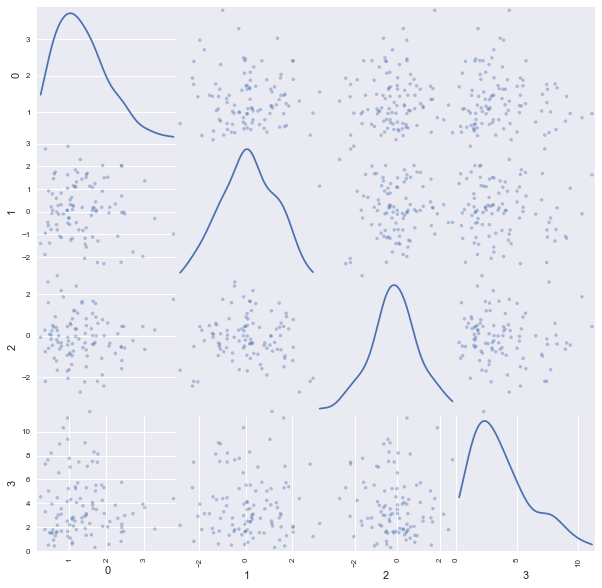

In [16]:
scatter_matrix(distDataFrameSources.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

## NPCA-RLS

(4, 100) (4, 100)
[[ 0.08124132  0.47630131  0.44926171  0.19148197]
 [ 0.31555855  0.08589591  0.28434392  0.12695179]
 [ 0.50924419  0.1733623   2.10752287  0.27839001]
 [ 0.20812051  0.61028158  0.5101538   0.34087266]]


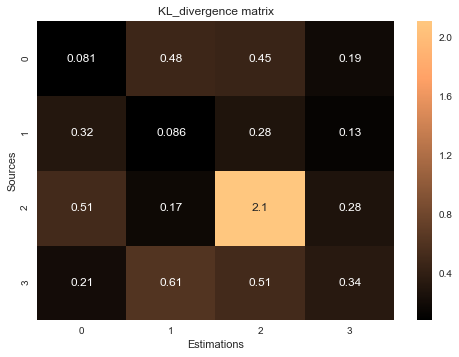

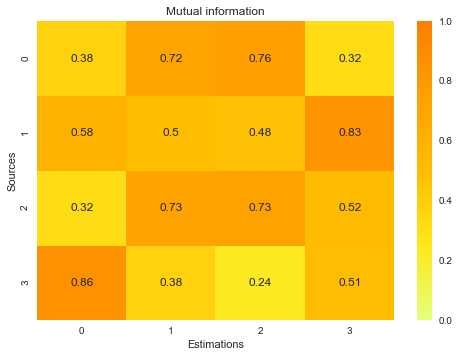

In [18]:
from evaluation import KLmatrix, MImatrix
KLmatrix(distDataFrameSources.values,yNPCA)
MImatrix(distDataFrameSources.values,yNPCA)

## Chichocki-Unbehauen Algorithm Feedback network

(4, 100) (4, 100)
[[ 0.15035735  0.4555382   0.6586746   0.21269138]
 [ 0.25070157  0.10223905  3.47169437  0.16134704]
 [ 0.42702122  0.12608506  6.60862035  0.46728545]
 [ 0.2761438   0.56927371  1.03709776  0.2022727 ]]


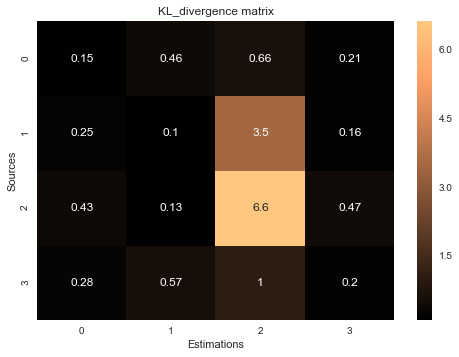

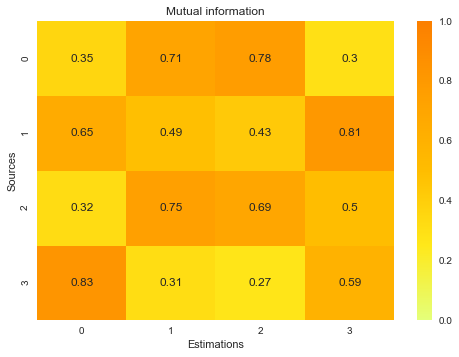

In [19]:
KLmatrix(distDataFrameSources.values,yFeedback)
MImatrix(distDataFrameSources.values,yFeedback)

## Chichocki-Unbehauen Algorithm Feedforward network

(4, 100) (4, 100)
[[ 0.15035735  0.4555382   0.65868191  0.21269138]
 [ 0.25070157  0.10223905  3.47174193  0.16134704]
 [ 0.42702122  0.12608506  6.60871183  0.46728545]
 [ 0.2761438   0.56927371  1.03710873  0.2022727 ]]


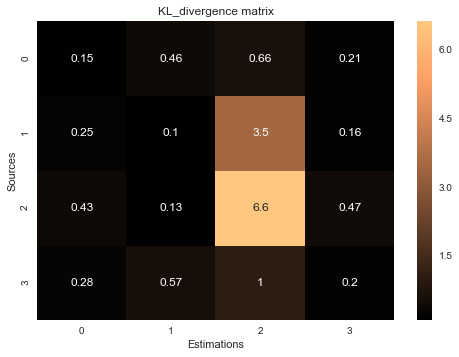

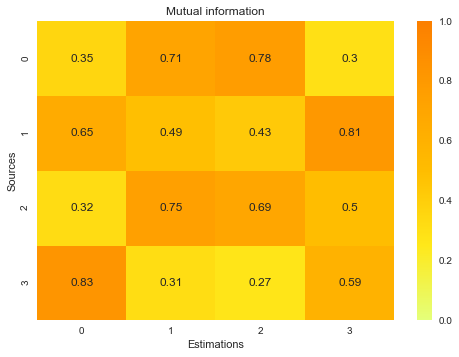

In [20]:
KLmatrix(distDataFrameSources.values,yFeedforward)
MImatrix(distDataFrameSources.values,yFeedforward)